# Modules

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd
import re

# exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
from textwrap import wrap
import textstat

# preprocessing input data
from bs4 import BeautifulSoup
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# train-test splitting
from sklearn.model_selection import train_test_split

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
import gensim, logging

# classifcation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [5]:
# matplot configs for visualization

small_size = 12
medium_size = 14
big_size = 16
large_size = 20

params = {
    'figure.figsize':(16,8),
    'font.size': small_size,
    'xtick.labelsize': medium_size,
    'ytick.labelsize': medium_size,
    'legend.fontsize': big_size,
    'figure.titlesize': large_size,
    'axes.titlesize': medium_size,
    'axes.labelsize': big_size
}
plt.rcParams.update(params)

# Step 1: Import the Data

In [6]:
labeled = pd.read_csv("labeledTrainData.tsv", header = 0, delimiter = "\t", quoting=3)
unlabeled = pd.read_csv("unlabeledTrainData.tsv", header = 0, delimiter = "\t", quoting=3)
unlabeled_plus = pd.read_csv("testData.tsv", header = 0, delimiter = "\t", quoting=3)

In [7]:
labeled.shape

(25000, 3)

In [8]:
unlabeled.shape

(50000, 2)

In [9]:
unlabeled_plus.shape

(25000, 2)

In [10]:
labeled.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [11]:
labeled.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [12]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [13]:
labeled.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [14]:
labeled_len = labeled['review'].apply(len)
labeled_len.describe()

count    25000.000000
mean      1329.710560
std       1005.239246
min         54.000000
25%        705.000000
50%        983.000000
75%       1619.000000
max      13710.000000
Name: review, dtype: float64

In [15]:
unlabeled_len = unlabeled['review'].apply(len)
unlabeled_len.describe()

count    50000.000000
mean      1334.618420
std       1006.913086
min         45.000000
25%        707.000000
50%        987.000000
75%       1624.000000
max      14318.000000
Name: review, dtype: float64

In [16]:
unlabeled_plus_len = unlabeled_plus['review'].apply(len)
unlabeled_plus_len.describe()

count    25000.000000
mean      1298.443280
std        978.123328
min         34.000000
25%        699.000000
50%        966.500000
75%       1577.000000
max      13006.000000
Name: review, dtype: float64

In [17]:
print(labeled["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

# Step 2: Data Cleaning and Text Preprocessing

#### Step 2A: Remove HTML Markup

In [18]:
example1 = BeautifulSoup(labeled["review"][0])

In [19]:
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

#### Step 2B: Punctuation, Numbers, Stopwords

##### Remove Non-Letters

In [20]:
# Use regular expression to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",          # pattern to search for
                     " ",                   # pattern to replace it
                      example1.get_text() )  # text to search

In [21]:
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

##### Convert to Lowercase and Split into Individual Words

In [22]:
lower_case = letters_only.lower()    # convert to lower case
tokens = word_tokenize(lower_case)   # split into tokens
print(tokens)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

##### Remove Stopwords

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# remove stop words from "words"
tokens = [t for t in tokens if not t in stopwords.words("english")]
print(tokens)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

#### Step 2C: Lemmatization

In [25]:
# initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
# function to retrieve wordnet tag
def get_wordnet_pos(word):
    # map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
               "N": wordnet.NOUN,
               "V": wordnet.VERB,
               "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [27]:
# function to lemmatize words
def get_lemmas(words):
    lemmatized_tokens = []
    for w in words:
        lemmatized_tokens.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
    return lemmatized_tokens

In [28]:
print(get_lemmas(tokens))

['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentary', 'watch', 'wiz', 'watch', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighty', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'go', 'see', 'cinema', 'originally', 'release', 'subtle', 'message', 'mj', 'feel', 'towards', 'press', 'also', 'obvious', 'message', 'drug', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movie', 'mj', 'fan', 'would', 'say', 'make', 'fan', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'start', 'minute', 'exclude', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', '

#### Step 2D: Create Text Preprocessing Function

In [29]:
def review_to_words(raw_review):
    # Functon to convert a raw review to a string of words
    # The input is a single string (a raw movie review)
    # The output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]"," ", review_text)
    
    # 3. Convert to lower case, split into individual words
    tokens = word_tokenize(letters_only.lower())
    
    # 4. Searching set faster than searching list ==> convert stop words to a set
    stops = set(stopwords.words("english"))
    
    # 5. Remove stop words
    meaningful_tokens = [t for t in tokens if not t in stops]
    
    # 6. Lemmatize meaningful words
    lemmatized_tokens = get_lemmas(meaningful_tokens)
    
    # 7. Join the words back into one string separated by space
    return( " ".join(lemmatized_tokens))

In [30]:
# Test if function is working
clean_review = review_to_words(labeled["review"][0])
print(clean_review)

stuff go moment mj start listen music watch odd documentary watch wiz watch moonwalker maybe want get certain insight guy thought really cool eighty maybe make mind whether guilty innocent moonwalker part biography part feature film remember go see cinema originally release subtle message mj feel towards press also obvious message drug bad kay visually impressive course michael jackson unless remotely like mj anyway go hate find boring may call mj egotist consent make movie mj fan would say make fan true really nice actual feature film bit finally start minute exclude smooth criminal sequence joe pesci convincing psychopathic powerful drug lord want mj dead bad beyond mj overheard plan nah joe pesci character rant want people know supply drug etc dunno maybe hate mj music lot cool thing like mj turn car robot whole speed demon sequence also director must patience saint come film kiddy bad sequence usually director hate work one kid let alone whole bunch perform complex dance scene bott

#### Step 2E: Clean Training Set

In [31]:
# get number of reviews based on the dataframe column size
num_reviews = labeled["review"].size
num_reviews

25000

In [32]:
print("Cleaning and parsing the labeled dataset movie reviews...\n")

# initialize empty list to hold clean reviews
clean_labeled_reviews = []

# loop over each review
for i in range(0, num_reviews):
    # status update for every 1000 reviews
    if ((i+1)%1000 == 0):
        print("Review %d of %d\n" % (i+1, num_reviews))
    # call function and add result to list of clean reviews
    clean_labeled_reviews.append(review_to_words(labeled["review"][i]))

Cleaning and parsing the labeled dataset movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [33]:
labeled_clean = labeled.copy()
labeled_clean["review"] = clean_labeled_reviews
labeled_clean = labeled_clean.drop(['id'], axis = 1)
labeled_clean.head()

,sentiment,review
0,1,stuff go moment mj start listen music watch od...
1,1,classic war world timothy hines entertain film...
2,0,film start manager nicholas bell give welcome ...
3,0,must assume praise film great film opera ever ...
4,1,superbly trashy wondrously unpretentious explo...


# Step 3: Exploratory Data Analysis

#### Descriptive Statistics

In [34]:
labeled_clean_len = labeled_clean['review'].apply(len)
labeled_clean_len.describe()

count    25000.000000
mean       785.402480
std        609.917991
min         26.000000
25%        406.000000
50%        575.000000
75%        955.000000
max       8669.000000
Name: review, dtype: float64

#### Null Values

In [35]:
labeled_clean.isnull().sum()

sentiment    0
review       0
dtype: int64

#### Class Distribution

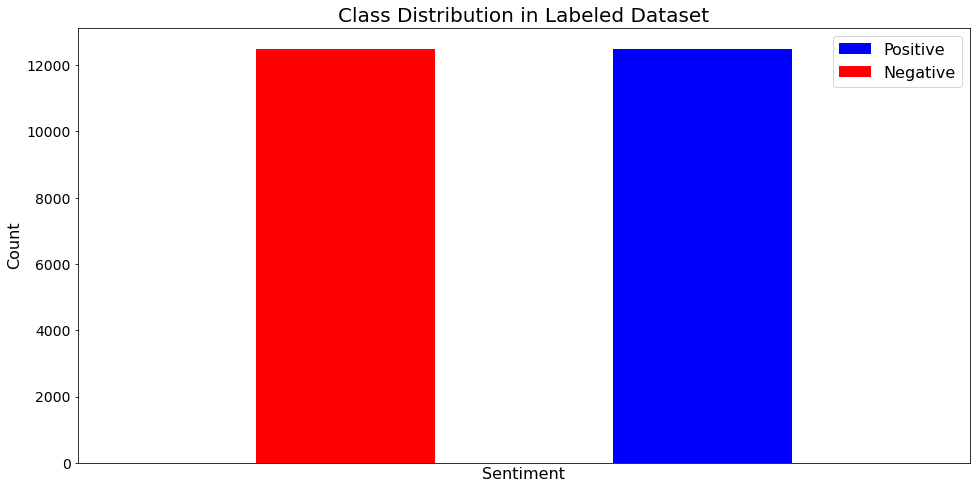

In [36]:
plt.hist(labeled_clean[labeled_clean.sentiment == 1].sentiment,
        bins = 2, color = 'blue', label = 'Positive')
plt.hist(labeled_clean[labeled_clean.sentiment == 0].sentiment,
        bins = 2, color = 'red', label = 'Negative')
plt.title('Class Distribution in Labeled Dataset', fontsize = large_size)
plt.xticks([])
plt.xlim(-0.5,2)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Readability of Reviews

In [37]:
labeled['text_standard'] = labeled['review'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of Positive Reviews: ', labeled[labeled['sentiment'] == 1]['text_standard'].mode())
print('Text Standard of Negative Reviews: ', labeled[labeled['sentiment'] == 0]['text_standard'].mode())

Text Standard of Positive Reviews:  0    6th and 7th grade
dtype: object
Text Standard of Negative Reviews:  0    6th and 7th grade
dtype: object


#### Average Reading Time

In [38]:
labeled['reading_time'] = labeled['review'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of Positive Reviews: ', labeled[labeled['sentiment'] == 1]['reading_time'].mean())
print('Reading Time of Negative Reviews: ', labeled[labeled['sentiment'] == 0]['reading_time'].mean())

Reading Time of Positive Reviews:  16.3934639999999
Reading Time of Negative Reviews:  15.833245599999728


#### Document Term Matrix

In [39]:
# group training set by sentiment
labeled_grouped = labeled_clean[['sentiment','review']].groupby(by = 'sentiment').agg(lambda x:' '.join(x))
labeled_grouped.head()

,review
sentiment,
0,film start manager nicholas bell give welcome ...
1,stuff go moment mj start listen music watch od...


In [40]:
# creating document term matrix with unigrams
unigram_vectorizer = CountVectorizer(analyzer = "word",
                            ngram_range = (1,1),
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)

# fit_transform has two functions: 
# (1) it fits the model and learns the vocabulary
# (2) it transforms training data into feature vectors
unigram_data = unigram_vectorizer.fit_transform(labeled_grouped['review'])
unigram_dtm = pd.DataFrame(unigram_data.toarray(), columns = unigram_vectorizer.get_feature_names())
unigram_dtm = unigram_dtm.transpose()
unigram_dtm.head()

,0,1
abandon,137,135
abc,38,87
ability,292,270
able,533,726
abraham,33,59


In [41]:
# creating document term matrix with bigram
bigram_vectorizer = CountVectorizer(analyzer = "word",
                            ngram_range = (2,2),
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)

# fit_transform has two functions: 
# (1) it fits the model and learns the vocabulary
# (2) it transforms training data into feature vectors
bigram_data = bigram_vectorizer.fit_transform(labeled_grouped['review'])
bigram_dtm = pd.DataFrame(bigram_data.toarray(), columns = bigram_vectorizer.get_feature_names())
bigram_dtm = bigram_dtm.transpose()
bigram_dtm.head()

,0,1
able get,24,29
able see,11,43
absolutely hilarious,9,32
absolutely love,14,77
absolutely nothing,131,23


In [42]:
# creating document term matrix with bigram
trigram_vectorizer = CountVectorizer(analyzer = "word",
                            ngram_range = (3,3),
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)

# fit_transform has two functions: 
# (1) it fits the model and learns the vocabulary
# (2) it transforms training data into feature vectors
trigram_data = trigram_vectorizer.fit_transform(labeled_grouped['review'])
trigram_dtm = pd.DataFrame(trigram_data.toarray(), columns = trigram_vectorizer.get_feature_names())
trigram_dtm = trigram_dtm.transpose()
trigram_dtm.head()

,0,1
absolute bad movie,10,0
absolute must see,0,8
absolutely love movie,3,14
absolutely nothing else,8,1
absolutely nothing movie,7,3


In [43]:
unigram_dtm = unigram_dtm.rename(columns = {0: "negative", 1: "positive"})
unigram_dtm['all'] = unigram_dtm['negative'] + unigram_dtm['positive']
unigram_dtm.head()

,negative,positive,all
abandon,137,135,272
abc,38,87,125
ability,292,270,562
able,533,726,1259
abraham,33,59,92


In [44]:
bigram_dtm = bigram_dtm.rename(columns = {0: "negative", 1: "positive"})
bigram_dtm['all'] = bigram_dtm['negative'] + bigram_dtm['positive']
bigram_dtm.head()

,negative,positive,all
able get,24,29,53
able see,11,43,54
absolutely hilarious,9,32,41
absolutely love,14,77,91
absolutely nothing,131,23,154


In [45]:
trigram_dtm = trigram_dtm.rename(columns = {0: "negative", 1: "positive"})
trigram_dtm['all'] = trigram_dtm['negative'] + trigram_dtm['positive']
trigram_dtm.head()

,negative,positive,all
absolute bad movie,10,0,10
absolute must see,0,8,8
absolutely love movie,3,14,17
absolutely nothing else,8,1,9
absolutely nothing movie,7,3,10


#### Most Frequently Occuring Tokens

**Unigrams**

In [46]:
top_negative_unigrams = pd.DataFrame(unigram_dtm['negative'].nlargest(20))
top_positive_unigrams = pd.DataFrame(unigram_dtm['positive'].nlargest(20))
top_unigrams = pd.DataFrame(unigram_dtm['all'].nlargest(20))

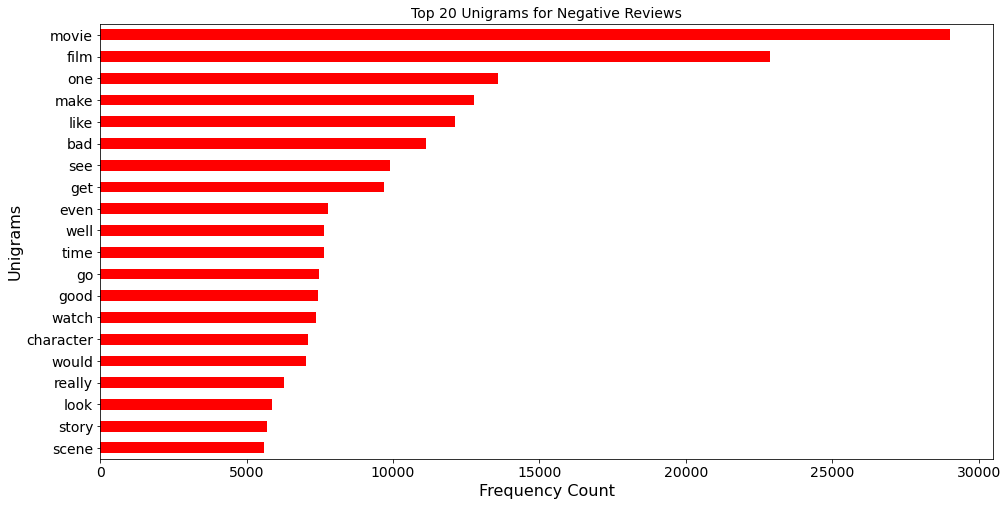

In [47]:
top_negative_unigrams.plot.barh(rot = 0, color = 'red')
plt.title('Top 20 Unigrams for Negative Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Unigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

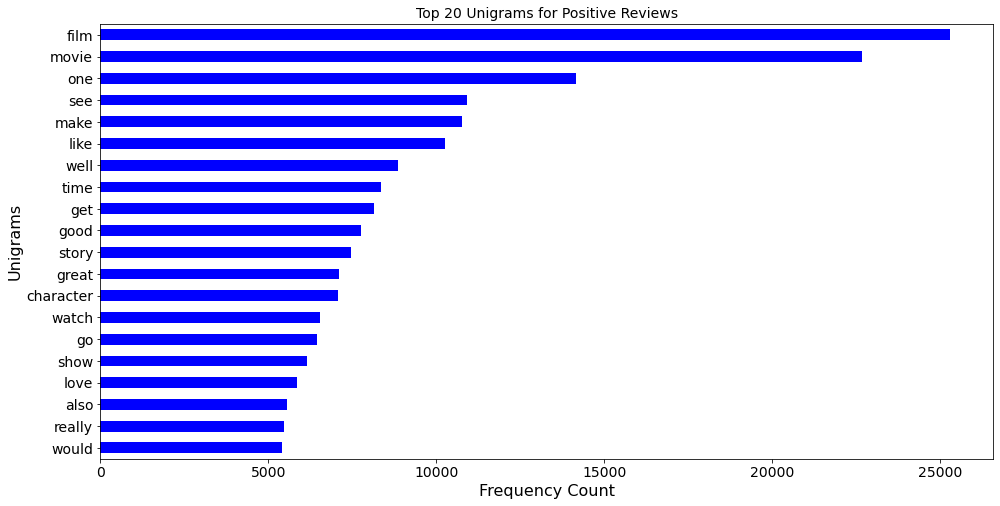

In [48]:
top_positive_unigrams.plot.barh(rot = 0, color = 'blue')
plt.title('Top 20 Unigrams for Positive Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Unigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

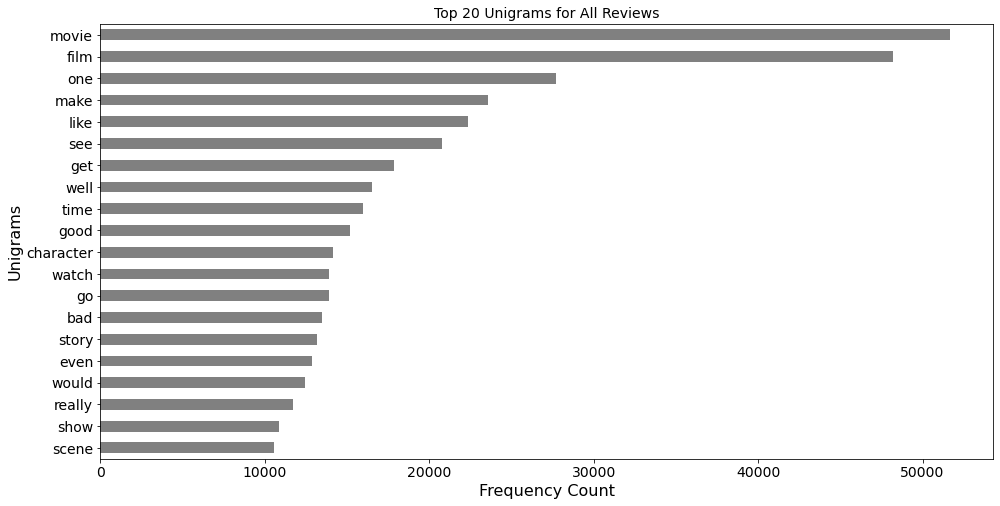

In [49]:
top_unigrams.plot.barh(rot = 0, color = 'grey')
plt.title('Top 20 Unigrams for All Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Unigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

**Bigrams**

In [50]:
top_negative_bigrams = pd.DataFrame(bigram_dtm['negative'].nlargest(20))
top_positive_bigrams = pd.DataFrame(bigram_dtm['positive'].nlargest(20))
top_bigrams = pd.DataFrame(bigram_dtm['all'].nlargest(20))

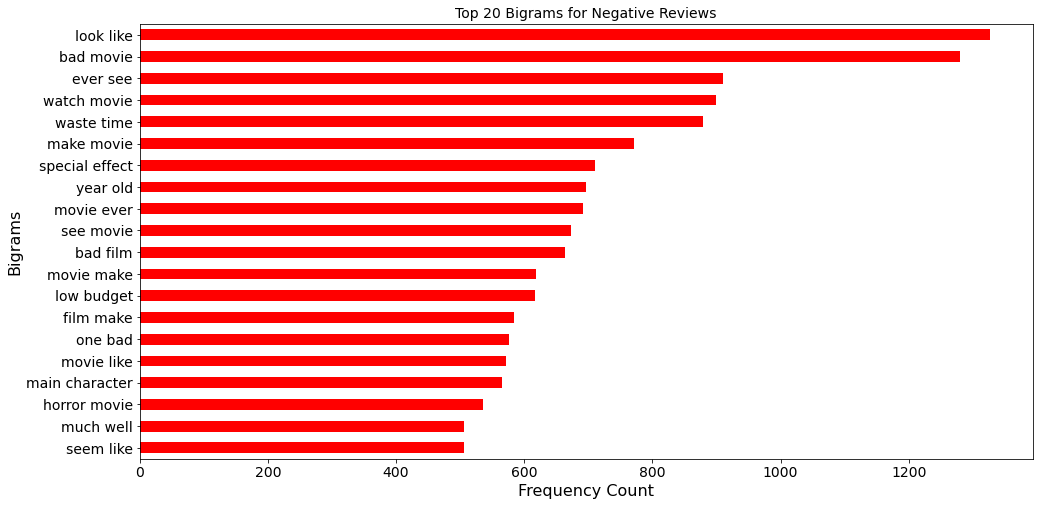

In [51]:
top_negative_bigrams.plot.barh(rot = 0, color = 'red')
plt.title('Top 20 Bigrams for Negative Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

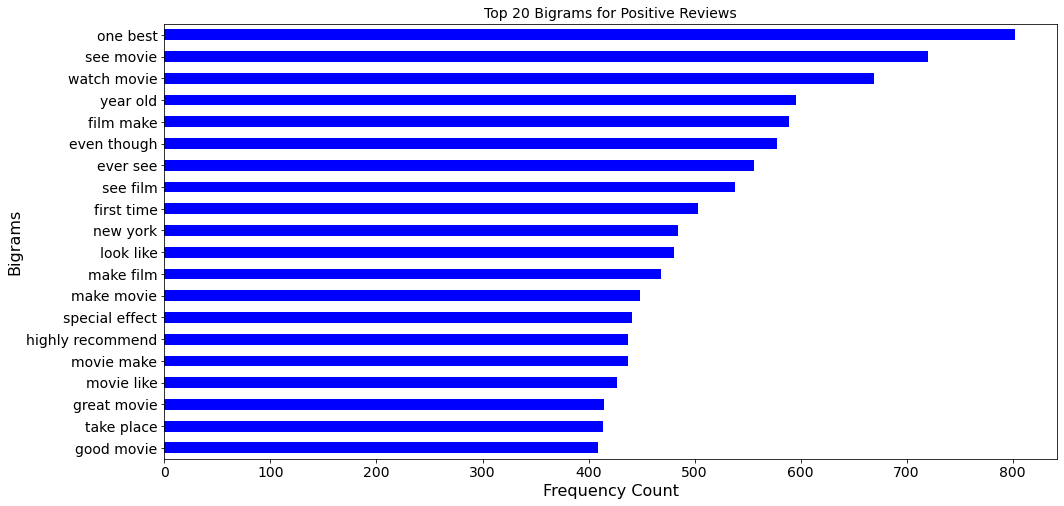

In [52]:
top_positive_bigrams.plot.barh(rot = 0, color = 'blue')
plt.title('Top 20 Bigrams for Positive Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

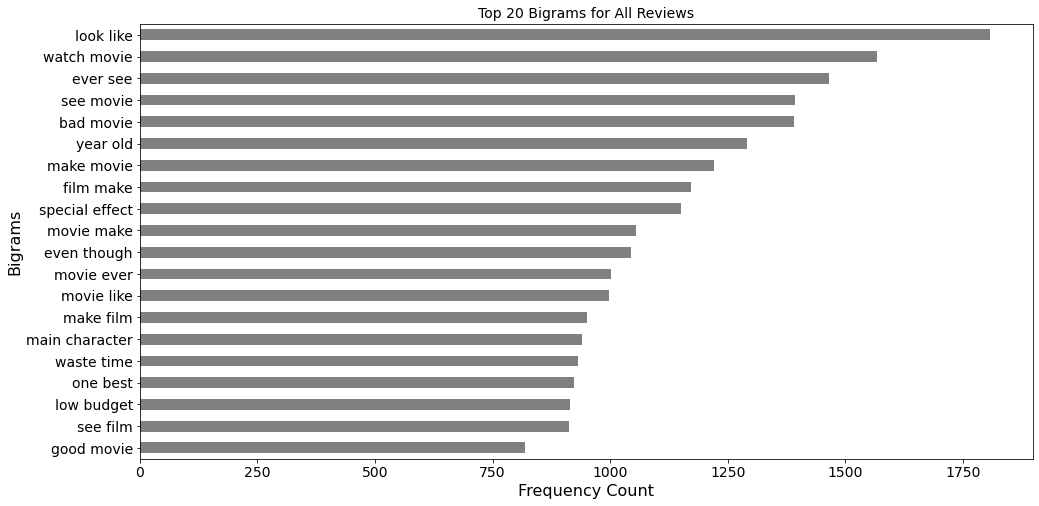

In [53]:
top_bigrams.plot.barh(rot = 0, color = 'grey')
plt.title('Top 20 Bigrams for All Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

**Trigrams**

In [54]:
top_negative_trigrams = pd.DataFrame(trigram_dtm['negative'].nlargest(20))
top_positive_trigrams = pd.DataFrame(trigram_dtm['positive'].nlargest(20))
top_trigrams = pd.DataFrame(trigram_dtm['all'].nlargest(20))

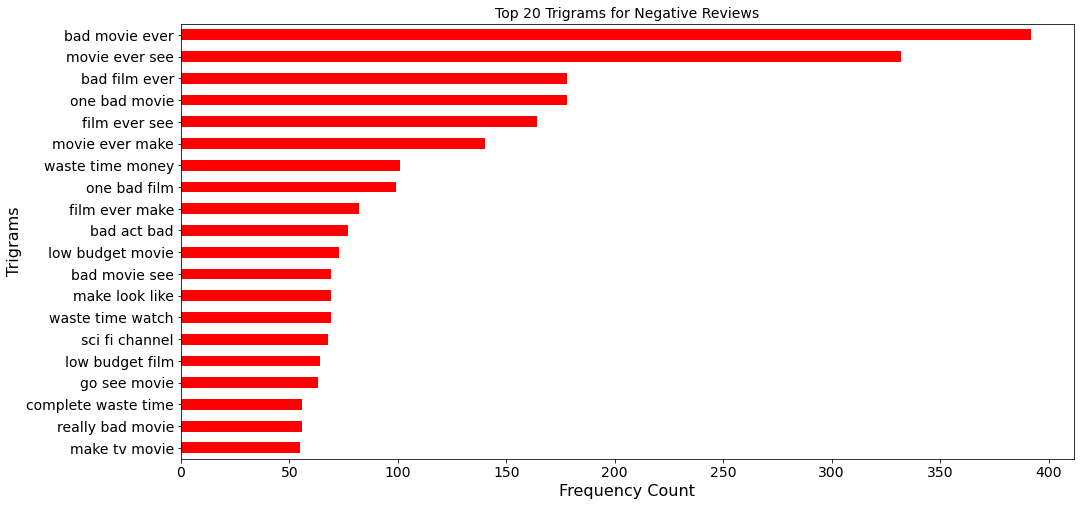

In [55]:
top_negative_trigrams.plot.barh(rot = 0, color = 'red')
plt.title('Top 20 Trigrams for Negative Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

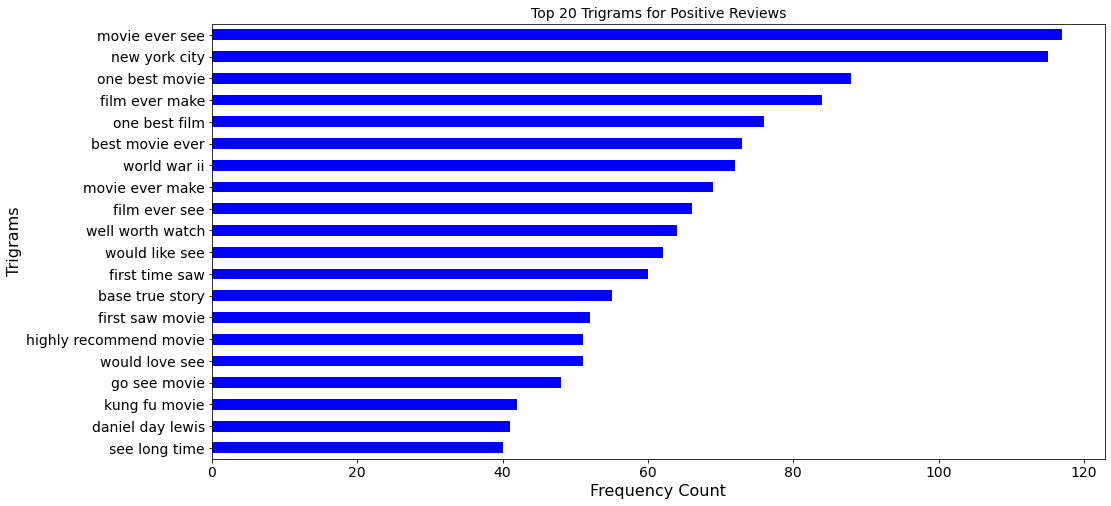

In [56]:
top_positive_trigrams.plot.barh(rot = 0, color = 'blue')
plt.title('Top 20 Trigrams for Positive Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

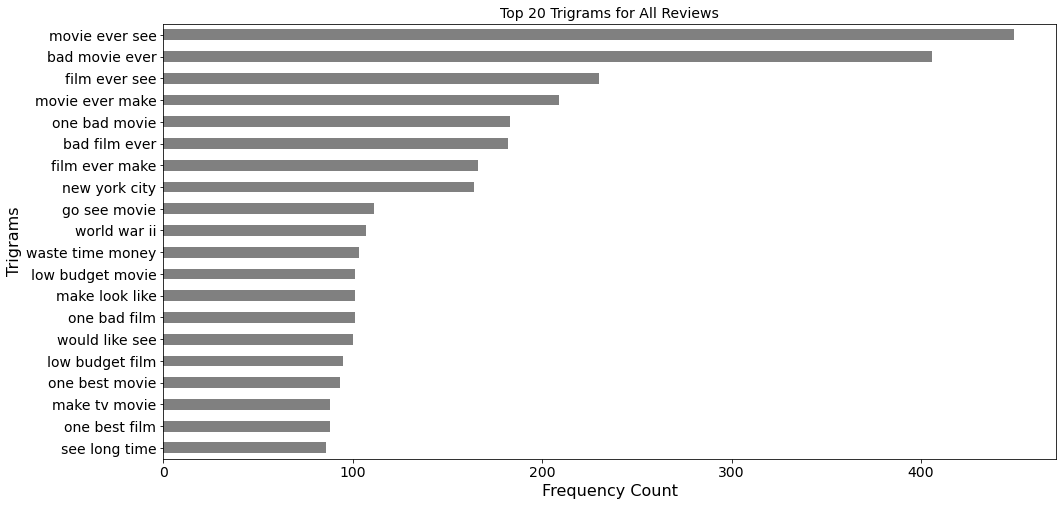

In [57]:
top_trigrams.plot.barh(rot = 0, color = 'grey')
plt.title('Top 20 Trigrams for All Reviews')
plt.xlabel('Frequency Count')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

#### WordClouds

In [58]:
# function to generate word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(width = 400, height = 330, max_words = 100, colormap = "Accent").generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)), fontsize = 13)
    plt.show()

**Unigrams**

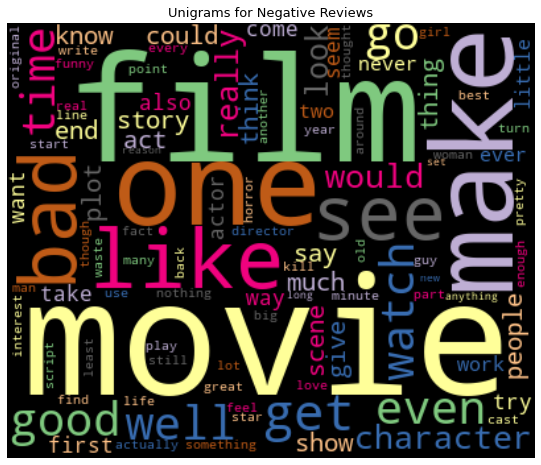

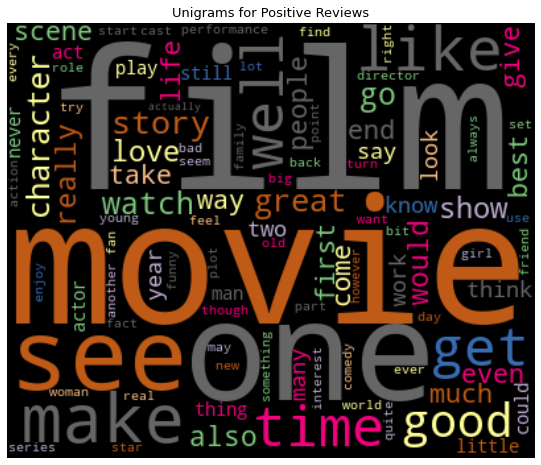

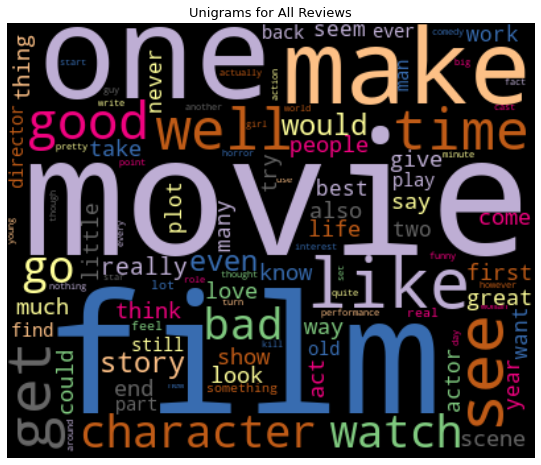

In [59]:
generate_wordcloud(unigram_dtm['negative'].sort_values(ascending = False), "Unigrams for Negative Reviews")
generate_wordcloud(unigram_dtm['positive'].sort_values(ascending = False), "Unigrams for Positive Reviews")
generate_wordcloud(unigram_dtm['all'].sort_values(ascending = False), "Unigrams for All Reviews")

**Bigrams**

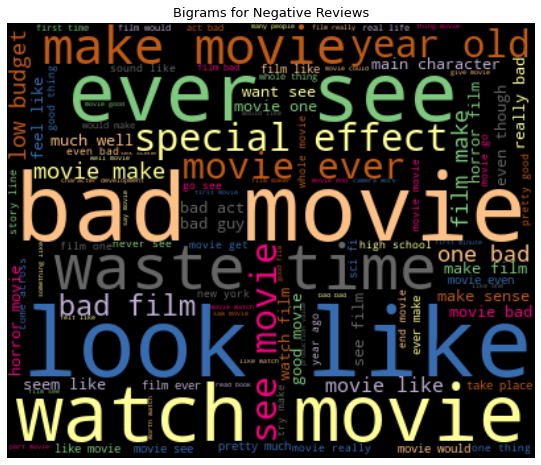

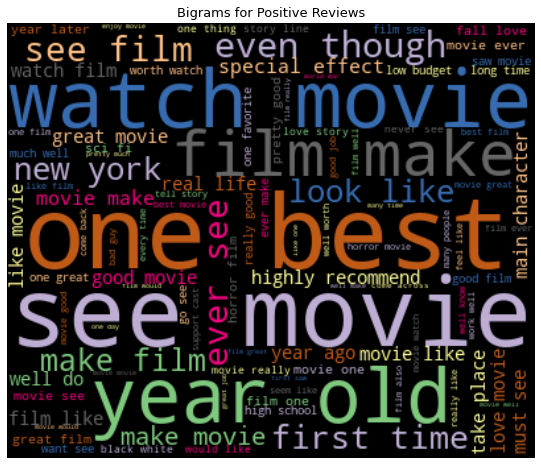

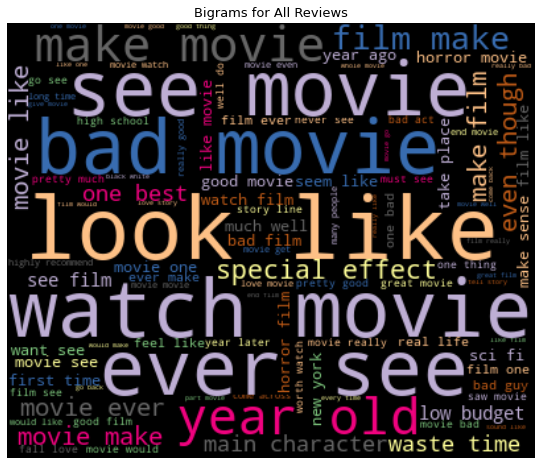

In [60]:
generate_wordcloud(bigram_dtm['negative'].sort_values(ascending = False), "Bigrams for Negative Reviews")
generate_wordcloud(bigram_dtm['positive'].sort_values(ascending = False), "Bigrams for Positive Reviews")
generate_wordcloud(bigram_dtm['all'].sort_values(ascending = False), "Bigrams for All Reviews")

**Trigrams**

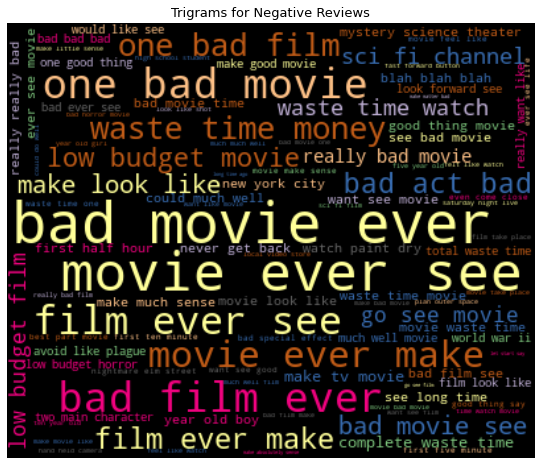

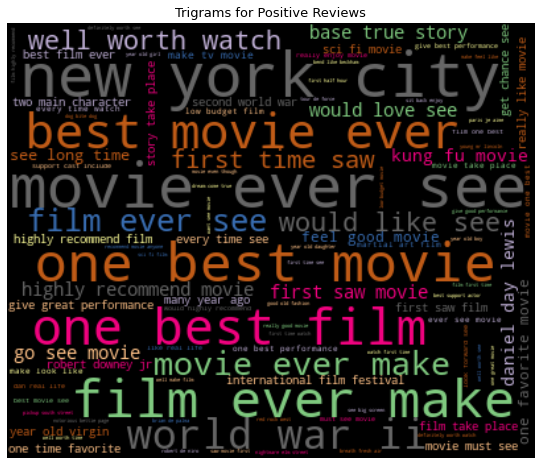

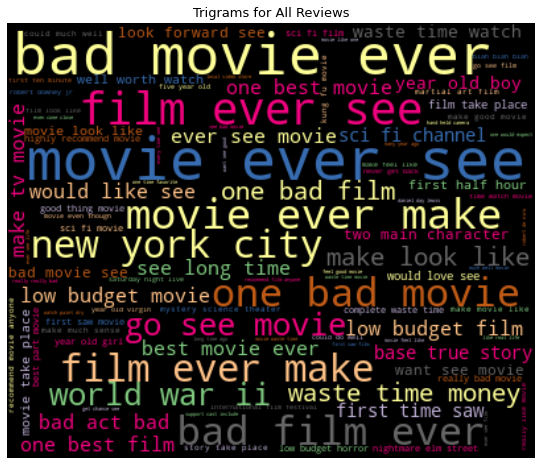

In [61]:
generate_wordcloud(trigram_dtm['negative'].sort_values(ascending = False), "Trigrams for Negative Reviews")
generate_wordcloud(trigram_dtm['positive'].sort_values(ascending = False), "Trigrams for Positive Reviews")
generate_wordcloud(trigram_dtm['all'].sort_values(ascending = False), "Trigrams for All Reviews")

# Step 4: Feature Extraction

In [62]:
# split the training set before vectorization

x = labeled_clean['review']
y = labeled_clean['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [63]:
print("shape of original dataset:", labeled_clean.shape)
print("shape of input - training set:", x_train.shape)
print("shape of output - training set:", y_train.shape)
print("shape of input - testing set:", x_test.shape)
print("shape of output - testing set:", y_test.shape)

shape of original dataset: (25000, 2)
shape of input - training set: (20000,)
shape of output - training set: (20000,)
shape of input - testing set: (5000,)
shape of output - testing set: (5000,)


In [64]:
x_train.head()

18057    go saw river tide today second time two day ye...
18880    one favorite show back recall go air friday po...
19355    really sexist classist thought might begin sta...
429      movie start pair camper man woman presumably t...
3219     one brilliant movie see recent time go way eve...
Name: review, dtype: object

In [65]:
# reset indices for both training and test sets
x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [66]:
x_train.head()

0    go saw river tide today second time two day ye...
1    one favorite show back recall go air friday po...
2    really sexist classist thought might begin sta...
3    movie start pair camper man woman presumably t...
4    one brilliant movie see recent time go way eve...
Name: review, dtype: object

#### Step 4A: Bag of Words

In [67]:
unigram_data_features = unigram_vectorizer.fit_transform(x_train)
unigram_data_features = unigram_data_features.toarray()
print(unigram_data_features.shape)

(20000, 5000)


In [68]:
bigram_data_features = bigram_vectorizer.fit_transform(x_train)
bigram_data_features = bigram_data_features.toarray()
print(bigram_data_features.shape)

(20000, 5000)


In [69]:
trigram_data_features = trigram_vectorizer.fit_transform(x_train)
trigram_data_features = trigram_data_features.toarray()
print(trigram_data_features.shape)

(20000, 5000)


#### Step 3B: Word2vec

#### Step 4A: TF-IDF

# Step 5: Classification

#### Step 5C: Random Forest

**BOW (Unigram)**

In [70]:
print("Training the unigram random forest...")

# initialaize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# fit the forest to the training set
# bag of word are the features
# sentiment labels are the response variable
bow_unigram_forest = forest.fit(unigram_data_features, y_train)

Training the unigram random forest...


In [71]:
# create an empty list and append the clean reviews one by one
num_test_reviews = len(x_test)
clean_test_reviews = []

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_test_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_test_reviews))
    clean_review = review_to_words(x_test[i])
    clean_test_reviews.append(clean_review)

Cleaning and parsing the test set movie reviews...

Review 1000 of 5000

Review 2000 of 5000

Review 3000 of 5000

Review 4000 of 5000

Review 5000 of 5000



In [72]:
# get bag of words for test set
unigram_test_data_features = unigram_vectorizer.transform(clean_test_reviews)
unigram_test_data_features = unigram_test_data_features.toarray()

In [73]:
# use random forest to make label predictions
bow_unigram_result = bow_unigram_forest.predict(unigram_test_data_features)

# check accuracy of label predictions
accuracy_score(y_test, bow_unigram_result)

0.8398

In [74]:
# view confusion matrix for test data and predictions
confusion_matrix(y_test, bow_unigram_result)

array([[2112,  400],
       [ 401, 2087]])

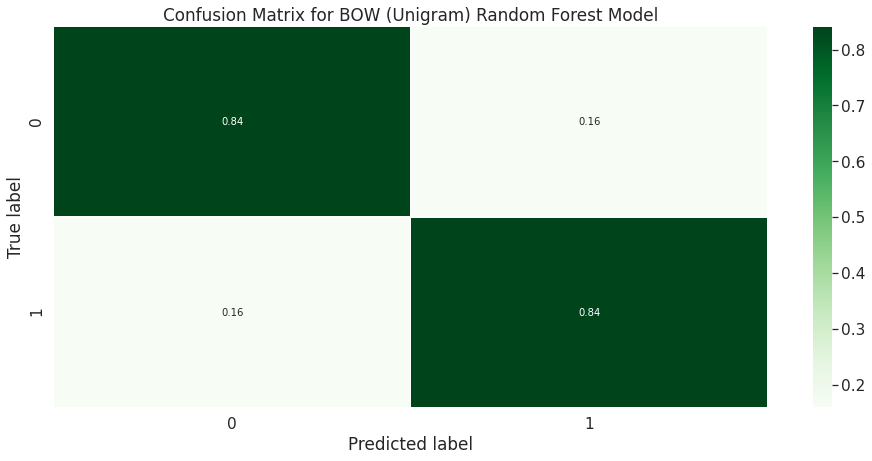

In [75]:
# get and reshape confusion matrix data
bow_unigram_matrix = confusion_matrix(y_test, bow_unigram_result)
bow_unigram_matrix = bow_unigram_matrix.astype('float') / bow_unigram_matrix.sum(axis = 1)[:, np.newaxis]

# build the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(bow_unigram_matrix, annot = True, annot_kws = {'size':10},
            cmap = plt.cm.Greens, linewidths = 0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for BOW (Unigram) Random Forest Model')
plt.show()

In [76]:
# view the classification report for test data and predictions
print(classification_report(y_test, bow_unigram_result))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2512
           1       0.84      0.84      0.84      2488

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



**BOW (Bigram)**

In [77]:
print("Training the bigram random forest...")

# initialaize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# fit the forest to the training set
# bag of word are the features
# sentiment labels are the response variable
bow_bigram_forest = forest.fit(bigram_data_features, y_train)

Training the bigram random forest...


In [78]:
# create an empty list and append the clean reviews one by one
num_test_reviews = len(x_test)
clean_test_reviews = []

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_test_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_test_reviews))
    clean_review = review_to_words(x_test[i])
    clean_test_reviews.append(clean_review)

Cleaning and parsing the test set movie reviews...

Review 1000 of 5000

Review 2000 of 5000

Review 3000 of 5000

Review 4000 of 5000

Review 5000 of 5000



In [79]:
# get bag of words for test set
bigram_test_data_features = bigram_vectorizer.transform(clean_test_reviews)
bigram_test_data_features = bigram_test_data_features.toarray()

In [91]:
# use random forest to make label predictions
bow_bigram_result = bow_bigram_forest.predict(bigram_test_data_features)

# check accuracy of label predictions
accuracy_score(y_test, bow_bigram_result)

0.7628

In [81]:
# view confusion matrix for test data and predictions
confusion_matrix(y_test, bow_bigram_result)

array([[1985,  527],
       [ 659, 1829]])

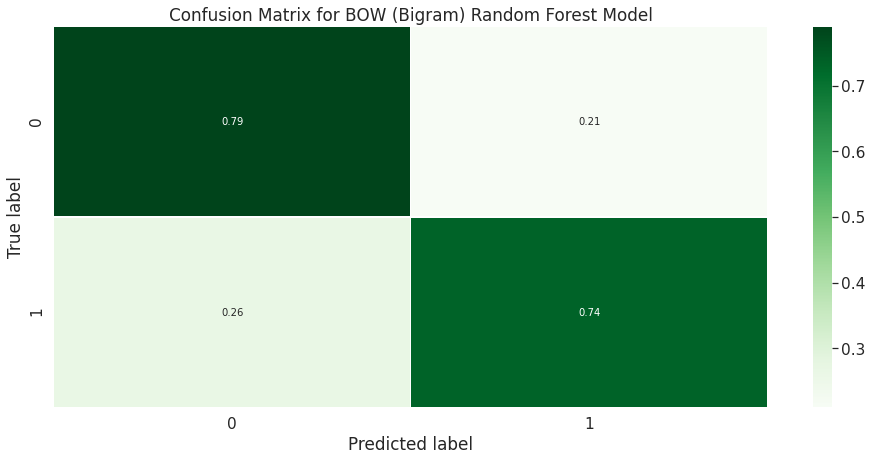

In [82]:
# get and reshape confusion matrix data
bow_bigram_matrix = confusion_matrix(y_test, bow_bigram_result)
bow_bigram_matrix = bow_bigram_matrix.astype('float') / bow_bigram_matrix.sum(axis = 1)[:, np.newaxis]

# build the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(bow_bigram_matrix, annot = True, annot_kws = {'size':10},
            cmap = plt.cm.Greens, linewidths = 0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for BOW (Bigram) Random Forest Model')
plt.show()

In [83]:
# view the classification report for test data and predictions
print(classification_report(y_test, bow_bigram_result))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2512
           1       0.78      0.74      0.76      2488

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



**BOW (Trigram)**

In [84]:
print("Training the trigram random forest...")

# initialaize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# fit the forest to the training set
# bag of word are the features
# sentiment labels are the response variable
bow_trigram_forest = forest.fit(trigram_data_features, y_train)

Training the trigram random forest...


In [85]:
# create an empty list and append the clean reviews one by one
num_test_reviews = len(x_test)
clean_test_reviews = []

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_test_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_test_reviews))
    clean_review = review_to_words(x_test[i])
    clean_test_reviews.append(clean_review)

Cleaning and parsing the test set movie reviews...

Review 1000 of 5000

Review 2000 of 5000

Review 3000 of 5000

Review 4000 of 5000

Review 5000 of 5000



In [86]:
# get bag of words for test set
trigram_test_data_features = trigram_vectorizer.transform(clean_test_reviews)
trigram_test_data_features = trigram_test_data_features.toarray()

In [87]:
# use random forest to make label predictions
bow_trigram_result = bow_trigram_forest.predict(trigram_test_data_features)

# check accuracy of label predictions
accuracy_score(y_test, bow_trigram_result)

0.6532

In [88]:
# view confusion matrix for test data and predictions
confusion_matrix(y_test, bow_trigram_result)

array([[1312, 1200],
       [ 534, 1954]])

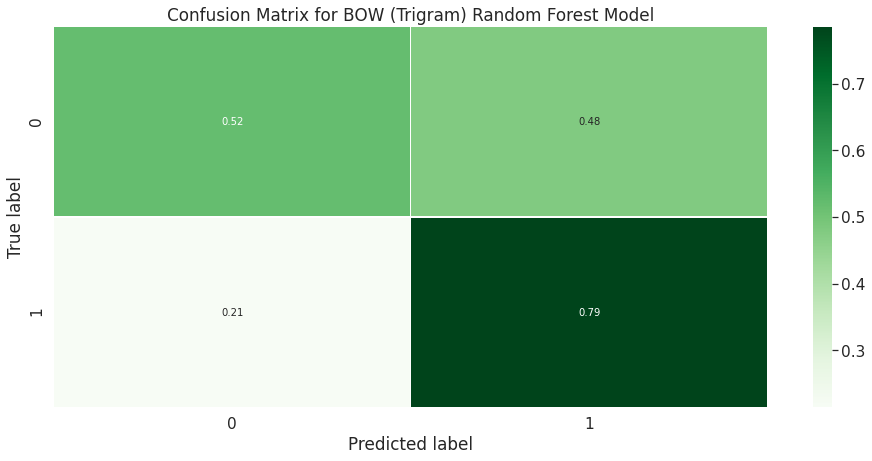

In [89]:
# get and reshape confusion matrix data
bow_trigram_matrix = confusion_matrix(y_test, bow_trigram_result)
bow_trigram_matrix = bow_trigram_matrix.astype('float') / bow_trigram_matrix.sum(axis = 1)[:, np.newaxis]

# build the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(bow_trigram_matrix, annot = True, annot_kws = {'size':10},
            cmap = plt.cm.Greens, linewidths = 0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for BOW (Trigram) Random Forest Model')
plt.show()

In [90]:
# view the classification report for test data and predictions
print(classification_report(y_test, bow_trigram_result))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60      2512
           1       0.62      0.79      0.69      2488

    accuracy                           0.65      5000
   macro avg       0.67      0.65      0.65      5000
weighted avg       0.67      0.65      0.65      5000

